In [1]:
# boilerplate code
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

In [4]:
qreg_q = QuantumRegister(1, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

In [5]:
circuit.reset(qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])

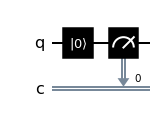

In [6]:
# visualize
circuit.draw('mpl')

In [9]:
# Import Aer
from qiskit import Aer, transpile

In [10]:
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = backend_sim.run(transpile(circuit, backend_sim), shots=1024)

In [11]:
result_sim = job_sim.result()
counts = result_sim.get_counts(circuit)
print(counts)

{'0': 1024}


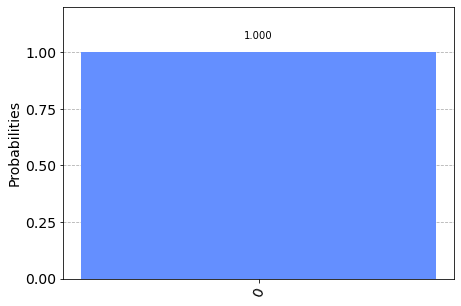

In [12]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

Now change the circuit and introduce superposition:

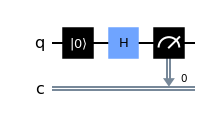

In [13]:
circuit = QuantumCircuit(qreg_q, creg_c)
circuit.reset(qreg_q[0])
# now Introduce Hadamard Gate;
circuit.h(qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])
circuit.draw('mpl')

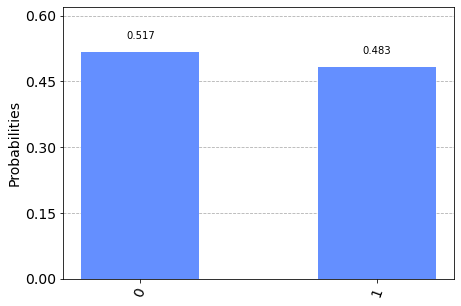

In [15]:
job_sim = backend_sim.run(transpile(circuit, backend_sim), shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(circuit)
plot_histogram(counts)

Now do this on a "real" Quantum Computer: 

In [16]:
from qiskit import IBMQ, assemble

In [17]:
IBMQ.save_account('<insert token here>')

configrc.store_credentials:WARNING:2022-05-08 18:17:27,040: Credentials already present. Set overwrite=True to overwrite.


In [18]:
provider = IBMQ.load_account()

In [19]:
backend = provider.backend.ibmq_quito
status = backend.status()
print(status.pending_jobs)

9


In [20]:
transpiled = transpile(circuit, backend=backend)

In [21]:
job = backend.run(transpiled)

In [24]:
retrieved_job = backend.retrieve_job(job.job_id())

In [25]:
result = retrieved_job.result()

In [26]:
counts = result.get_counts(circuit)

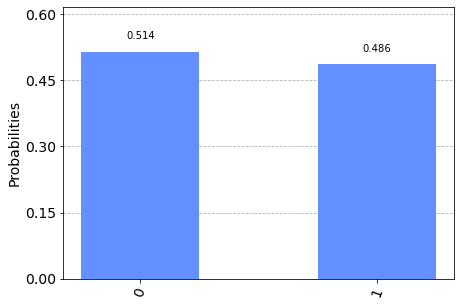

In [27]:
plot_histogram(counts)

Now with the simper circuit (0> state)

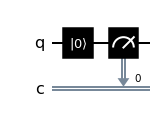

In [28]:
circuit = QuantumCircuit(qreg_q, creg_c)
circuit.reset(qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])
circuit.draw('mpl')

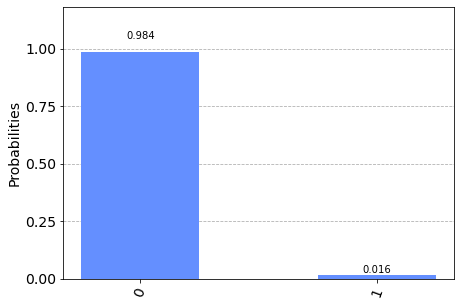

In [29]:
transpiled = transpile(circuit, backend=backend)
job = backend.run(transpiled)
retrieved_job = backend.retrieve_job(job.job_id())
result = retrieved_job.result()
counts = result.get_counts(circuit)
plot_histogram(counts)